In [1]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 

from imblearn.over_sampling import SMOTE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data sets/Assignment Data.csv')

In [4]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,NaN,NaN,NaN
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,NaN,NaN,NaN
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,NaN,NaN,NaN
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,NaN,NaN,NaN
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,NaN,NaN,NaN


In [5]:
counts = df['variety'].copy().value_counts()
counts.shape

(707,)

In [6]:
# Removes the outliers from the dataset
df = df[df['variety'].notna()]
counts = df['variety'].value_counts()
to_remove = counts[counts<1000].index
filterd_data = df[~df['variety'].isin(to_remove)]
filterd_data.head(4)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,NaN,NaN,NaN
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,NaN,NaN,NaN
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,NaN,NaN,NaN
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,NaN,NaN,NaN


In [7]:
df['variety'].value_counts()

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
                              ...  
Cabernet Sauvignon-Barbera        1
Sauvignonasse                     1
Forcallà                          1
Meseguera                         1
Bobal-Cabernet Sauvignon          1
Name: variety, Length: 707, dtype: int64

In [8]:
# creating new df just for input and outpur
new_df = df[['description', 'variety']]
#checking the data description fot white blend catogaory 
new_df[new_df['variety']=='White Blend']

,description,variety
0,"Aromas include tropical fruit, broom, brimston...",White Blend
22,Delicate aromas recall white flower and citrus...,White Blend
26,Pretty aromas of yellow flower and stone fruit...,White Blend
32,"Part of the extended Calanìca series, this Gri...",White Blend
105,Made predominantly with Trebbiano and Malvasia...,White Blend
...,...,...
129841,This Bradgate blend of Chenin and Sauvignon Bl...,White Blend
129884,"After 23 months in barrel, this Viura-Malvasia...",White Blend
129899,"Aged entirely in stainless steel, this combine...",White Blend
129933,Bründlmayer makes a particularly felicitous br...,White Blend


In [9]:
new_df[new_df['variety']=='Riesling']

,description,variety
3,"Pineapple rind, lemon pith and orange blossom ...",Riesling
15,Zesty orange peels and apple notes abound in t...,Riesling
47,This is a sweet wine with flavors of white sug...,Riesling
76,Earthy pollen and mineral notes lend a savory ...,Riesling
85,"Pronounced dust, pollen and earth tones lend s...",Riesling
...,...,...
129918,"Despite plenty of honeyed sweetness, this wine...",Riesling
129923,"Thick, oily and sweet, this wine is clearly no...",Riesling
129924,Imagine honeyed orange sections—that's what th...,Riesling
129946,"Plump, clingy peach and honey notes are cut wi...",Riesling


In [10]:
data_categories = filterd_data['description'].groupby(filterd_data['variety'])
i = 1
print('===========Original Categories =======================')
for catName,dataCategory in data_categories:
    print('Cat:'+str(i)+' '+catName + ' : '+ str(len(dataCategory)) )
    i = i+1
print('==================================')

===========Original Categories =======================
Cat:1 Bordeaux-style Red Blend : 6915
Cat:2 Bordeaux-style White Blend : 1066
Cat:3 Cabernet Franc : 1353
Cat:4 Cabernet Sauvignon : 9472
Cat:5 Champagne Blend : 1396
Cat:6 Chardonnay : 11753
Cat:7 Gamay : 1025
Cat:8 Gewürztraminer : 1012
Cat:9 Grüner Veltliner : 1345
Cat:10 Malbec : 2652
Cat:11 Merlot : 3102
Cat:12 Nebbiolo : 2804
Cat:13 Pinot Grigio : 1052
Cat:14 Pinot Gris : 1455
Cat:15 Pinot Noir : 13272
Cat:16 Portuguese Red : 2466
Cat:17 Portuguese White : 1159
Cat:18 Red Blend : 8946
Cat:19 Rhône-style Red Blend : 1471
Cat:20 Riesling : 5189
Cat:21 Rosé : 3564
Cat:22 Sangiovese : 2707
Cat:23 Sauvignon Blanc : 4967
Cat:24 Sparkling Blend : 2153
Cat:25 Syrah : 4142
Cat:26 Tempranillo : 1810
Cat:27 White Blend : 2360
Cat:28 Zinfandel : 2714


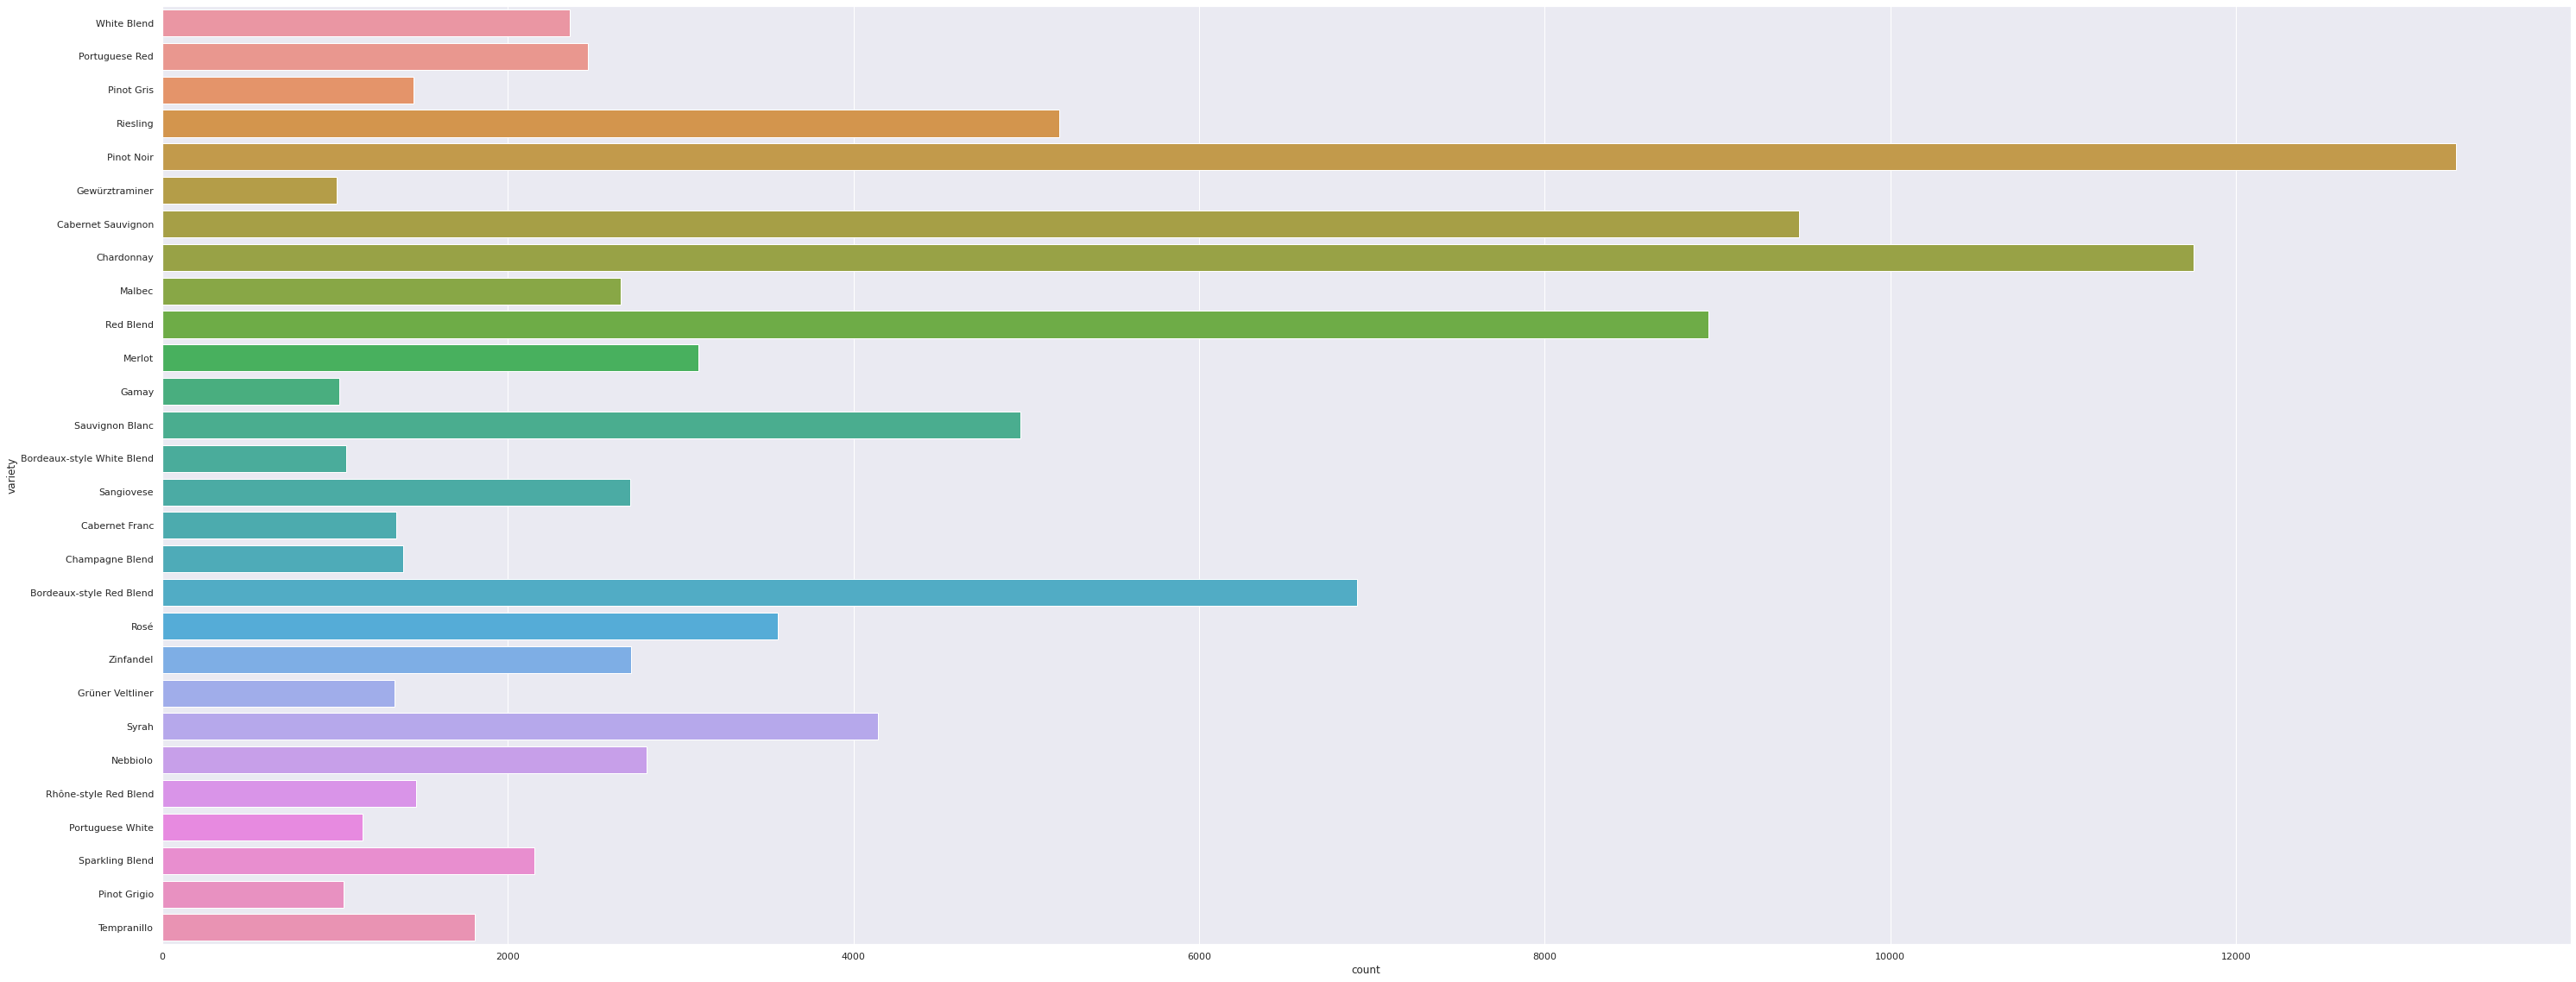

In [11]:
plt.figure(figsize=(50,20))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="variety", data=filterd_data)

In [12]:
data = filterd_data[['description', 'variety']]

In [15]:
def clean_text(text ): 
    text = text.translate(str.maketrans('', '', string.punctuation))
    text1 = ''.join([w for w in text if not w.isdigit()]) 
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    #BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    
    text2 = text1.lower()
    text2 = REPLACE_BY_SPACE_RE.sub('', text2) # replace REPLACE_BY_SPACE_RE symbols by space in text
    #text2 = BAD_SYMBOLS_RE.sub('', text2)
    return text2

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    
    intial_sentences= sentences[0:1]
    final_sentences = sentences[len(sentences)-2: len(sentences)-1]
    
    for sentence in intial_sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    for sentence in final_sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))       
    return ' '.join(wordlist) 

In [22]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [23]:
data['description'] = data['description'].apply(lemmatize_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
data['description'] = data['description'].apply(clean_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
print('Sample description 1:'+data.iloc[5]['description']+'\n')

Sample description 1:this dry and restrained wine offer spice in profusion  this dry and restrained wine offer spice in profusion 



In [27]:
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',ngram_range=(1,3), max_df=0.75, use_idf=True, smooth_idf=True, max_features=1000)
tfIdfMat  = vectorizer.fit_transform(data['description'].tolist() )
feature_names = sorted(vectorizer.get_feature_names())
print(feature_names)

['accent', 'accented', 'accessible', 'acid', 'acidic', 'acidity', 'acidity wine', 'add', 'aftertaste', 'age', 'aged', 'aging', 'alcohol', 'almond', 'alongside', 'ample', 'anise', 'appeal', 'appealing', 'appellation', 'apple', 'apple citrus', 'apple flavor', 'apple pear', 'approachable', 'apricot', 'aroma', 'aroma black', 'aroma blackberry', 'aroma cherry', 'aroma come', 'aroma flavor', 'aroma followed', 'aroma lead', 'aroma lead nose', 'aroma red', 'aroma ripe', 'aromas', 'aromatic', 'aromatically', 'aromatics', 'asian', 'asphalt', 'assertive', 'astringent', 'attractive', 'austere', 'backbone', 'backed', 'background', 'bacon', 'baked', 'baked apple', 'baking', 'baking spice', 'balance', 'balanced', 'balanced wine', 'balsamic', 'balsamic note', 'banana', 'barolo', 'barrel', 'barrel spice', 'based', 'basic', 'bean', 'beautiful', 'beautifully', 'beef', 'bell', 'bell pepper', 'berry', 'berry aroma', 'berry cherry', 'berry flavor', 'berry fruit', 'best', 'better', 'big', 'bit', 'bite', 'bit

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:

pca = PCA(n_components=0.95)
tfIdfMat_reduced = pca.fit_transform(tfIdfMat.toarray())
labels = data['variety'].tolist()
category_list = data.variety.unique()
X_train, X_test, y_train, y_test = train_test_split(tfIdfMat_reduced, labels, stratify=labels,random_state=1)  

In [30]:
print('Train_Set_Size:'+str(X_train.shape))
print('Test_Set_Size:'+str(X_test.shape))

Train_Set_Size:(77491, 813)
Test_Set_Size:(25831, 813)


In [ ]:
clf = LogisticRegression(penalty= 'elasticnet', solver= 'saga', l1_ratio=0.5, random_state=1).fit(X_train, y_train)
y_test_pred= clf.predict(X_test)

In [60]:
print(classification_report(y_test,y_test_pred,labels=category_list))

                            precision    recall  f1-score   support

               White Blend       0.67      0.45      0.54       590
            Portuguese Red       0.48      0.40      0.43       616
                Pinot Gris       0.68      0.37      0.48       364
                  Riesling       0.70      0.74      0.72      1297
                Pinot Noir       0.57      0.78      0.66      3318
            Gewürztraminer       0.61      0.38      0.47       253
        Cabernet Sauvignon       0.55      0.65      0.60      2368
                Chardonnay       0.61      0.81      0.70      2938
                    Malbec       0.53      0.36      0.43       663
                 Red Blend       0.59      0.57      0.58      2237
                    Merlot       0.74      0.35      0.47       776
                     Gamay       0.54      0.25      0.34       256
           Sauvignon Blanc       0.60      0.61      0.60      1242
Bordeaux-style White Blend       0.46      0.22

In [62]:
def predict_catogary(X_test, train=X_train, model=clf):
  pred = clf.predict(X_test)
  return category_list[pred[0]]